In [23]:
import torch #Импортируем торч
import matplotlib.pyplot as plt #Импоротруем графики

In [24]:
import matplotlib #Настраиваем окно графика
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

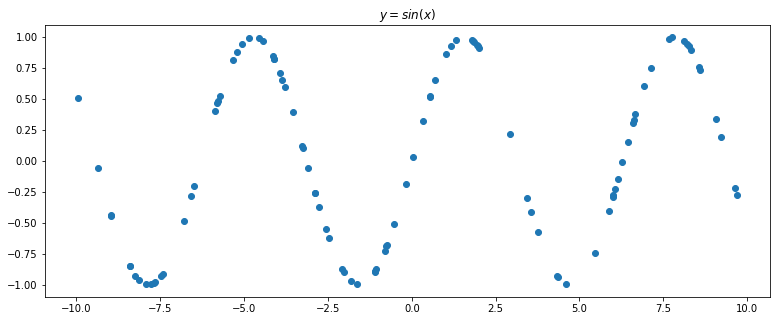

In [25]:
#Генерируем обучающую выборку
# x_train - входные данные(аргумент функции)
x_train = torch.rand(100) #Генерируем случайные числа от 0 до 1
x_train = x_train * 20.0 - 10.0 #Вписываем их от -10 до 10
# y_train - выходные данные(функция от x_train)
y_train = torch.sin(x_train)# Берём синус

plt.plot(x_train.numpy(), y_train.numpy(), 'o')#Строим график
plt.title('$y = sin(x)$');

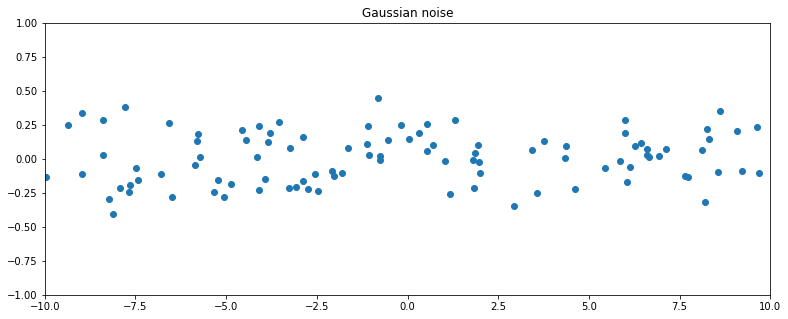

In [26]:
noise = torch.randn(y_train.shape) / 5. #Создаём шум

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

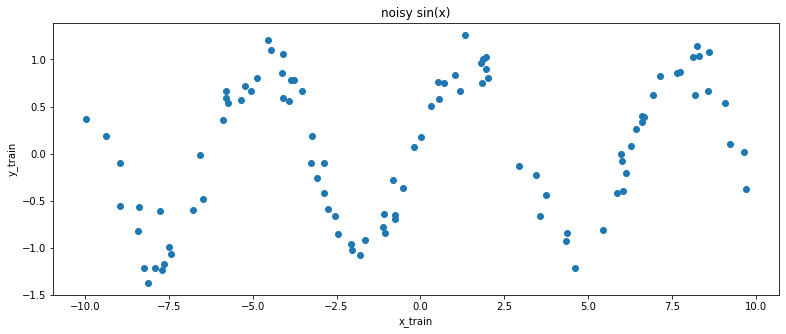

In [27]:
y_train = y_train + noise #Накладываем шум
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [28]:
x_train.unsqueeze_(1) #Переворачиваем вектора
y_train.unsqueeze_(1);

In [29]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


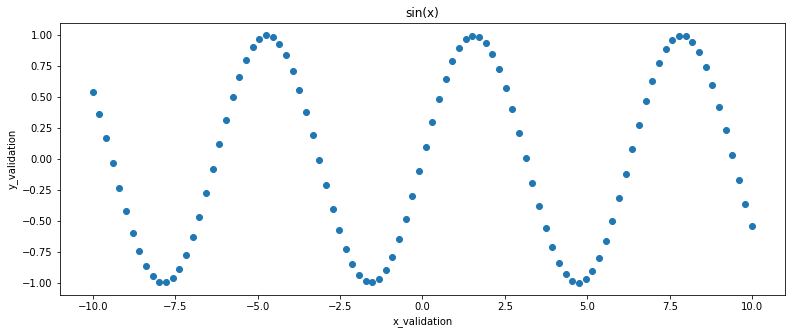

In [30]:
#Генерируем проверочную выборку
x_validation = torch.linspace(-10, 10, 100) #Генерируем х
y_validation = torch.sin(x_validation.data) #генерируем у
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [31]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [32]:
#Создаём сеть
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) #Линейный слой
        self.act1 = torch.nn.Sigmoid() #Функция активации
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1) #Линейный слой

    def forward(self, x): #Прописываем порядок выполнения слоёв
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(3) #Создаём экземпляр сети с заданным количеством нейронов

In [ ]:
#Предсказание сети
def predict(net, x, y):
    y_pred = net.forward(x) #Прямой ход

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

In [ ]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01) #Оптимизатор(как шагать)

In [ ]:
#Функция потерь
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [ ]:
#Процедура обучения
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)